In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data  = pd.read_csv("Bankruptcy Prediction.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.shape

(6819, 96)

In [4]:
data.isnull().sum().sum()

0

In [5]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
data.duplicated().sum().sum()

0

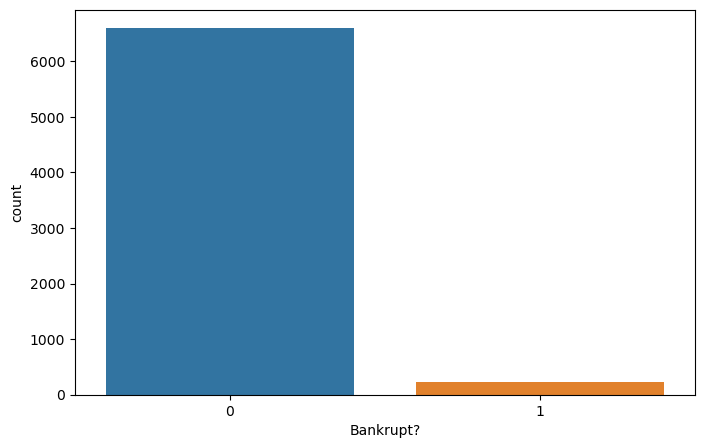

In [7]:
plt.figure(figsize=(8,5))
sn.countplot(x=data['Bankrupt?'],data=data)
plt.show()

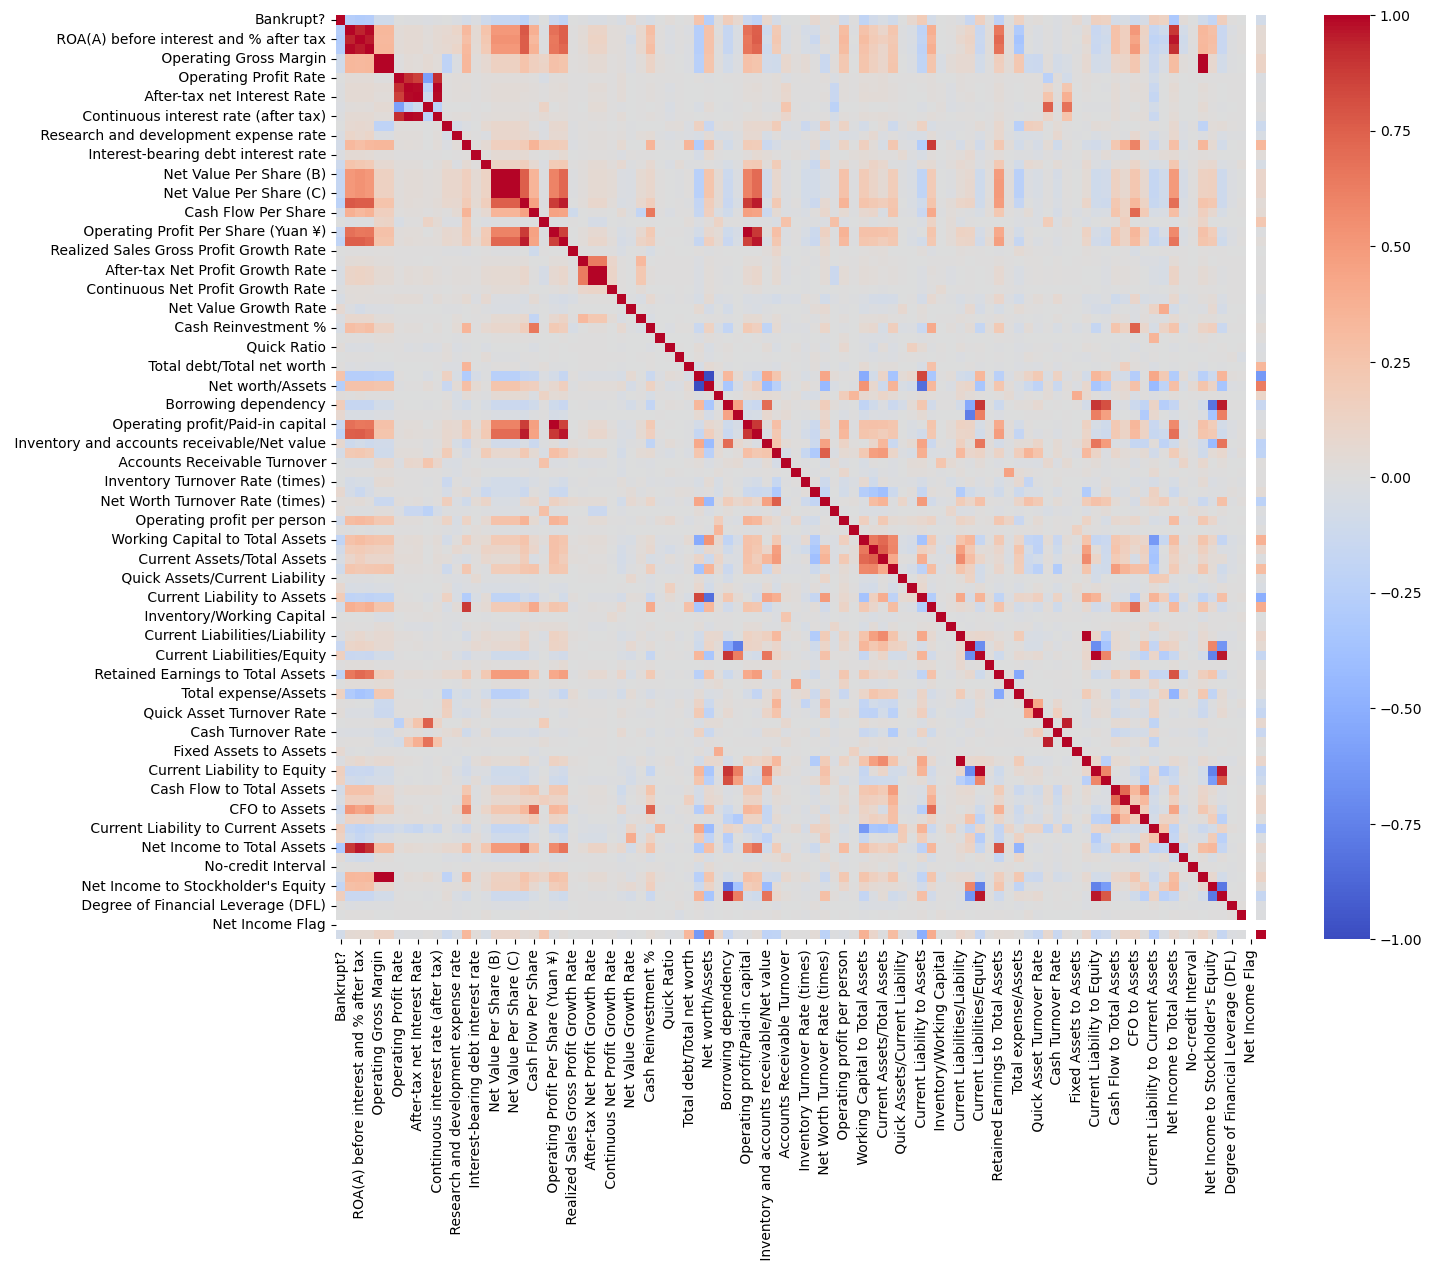

In [8]:
plt.figure(figsize=(15,12))
sn.heatmap(data.corr(),cmap='coolwarm',annot=False,fmt='.2f')
plt.show()

In [9]:
#extract important features using correlation
correlation_matrix = data.corr()
correlation_matrix['Bankrupt?'].sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

In [10]:
important_features = correlation_matrix['Bankrupt?'][correlation_matrix['Bankrupt?']>=0].index
df = data[important_features]

In [11]:
df

,Bankrupt?,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,...,Quick Asset Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Liability to Equity,Degree of Financial Leverage (DFL)
0,1,0.000327,0.001208,0.021266,0.207576,0.005024,0.390284,0.006479,0.398036,1.165007e-04,...,6.550000e+09,0.671568,0.424206,0.339077,0.126549,0.118250,0,0.009219,0.290202,0.026601
1,1,0.000443,0.004039,0.012502,0.171176,0.005059,0.376760,0.005835,0.397725,7.190000e+08,...,7.700000e+09,0.671570,0.468828,0.329740,0.120916,0.047775,0,0.008323,0.283846,0.264577
2,1,0.000396,0.005348,0.021248,0.207516,0.005100,0.379093,0.006562,0.406580,2.650000e+09,...,1.022676e-03,0.671571,0.276179,0.334777,0.117922,0.025346,0,0.040003,0.290189,0.026555
3,1,0.000382,0.002896,0.009572,0.151465,0.005047,0.379743,0.005366,0.397925,9.150000e+09,...,6.050000e+09,0.671519,0.559144,0.331509,0.120760,0.067250,0,0.003252,0.281721,0.026697
4,1,0.000439,0.003727,0.005150,0.106509,0.005303,0.375025,0.006624,0.400079,2.935211e-04,...,5.050000e+09,0.671563,0.309555,0.330726,0.110933,0.047725,0,0.003878,0.278514,0.024752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.000450,0.005457,0.006655,0.124618,0.005150,0.373823,0.005366,0.404804,1.429781e-04,...,1.244230e-04,0.671570,0.400338,0.330914,0.112622,0.027951,0,0.000466,0.279606,0.027064
6815,0,0.000445,0.006741,0.004623,0.099253,0.006772,0.372505,0.008619,0.399926,6.051982e-04,...,1.173396e-04,0.671572,0.096136,0.329753,0.112329,0.031470,0,0.001959,0.278132,0.027009
6816,0,0.000435,0.035112,0.001392,0.038939,0.009149,0.369637,0.005366,0.395592,1.024298e-03,...,1.749713e-04,0.671564,0.055509,0.326921,0.110933,0.007542,0,0.002840,0.275789,0.026791
6817,0,0.000529,0.007256,0.003816,0.086979,0.005529,0.369649,0.007068,0.401540,2.330013e-04,...,1.351937e-04,0.671606,0.246805,0.329294,0.110957,0.022916,0,0.002837,0.277547,0.026822


we can use these 30 columns which is extracted using feature engineering process correlation matrix.
Now we can use these columns and create a final dataframe after that we perform EDA.

In [12]:
data = pd.read_csv("Bankruptcy Prediction.csv")
final_data= pd.DataFrame(data=data,columns=df.columns)

In [13]:
final_data.head()

,Bankrupt?,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,...,Quick Asset Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Liability to Equity,Degree of Financial Leverage (DFL)
0,1,0.000327,0.001208,0.021266,0.207576,0.005024,0.390284,0.006479,0.398036,1.165007e-04,...,6.550000e+09,0.671568,0.424206,0.339077,0.126549,0.118250,0,0.009219,0.290202,0.026601
1,1,0.000443,0.004039,0.012502,0.171176,0.005059,0.376760,0.005835,0.397725,7.190000e+08,...,7.700000e+09,0.671570,0.468828,0.329740,0.120916,0.047775,0,0.008323,0.283846,0.264577
2,1,0.000396,0.005348,0.021248,0.207516,0.005100,0.379093,0.006562,0.406580,2.650000e+09,...,1.022676e-03,0.671571,0.276179,0.334777,0.117922,0.025346,0,0.040003,0.290189,0.026555
3,1,0.000382,0.002896,0.009572,0.151465,0.005047,0.379743,0.005366,0.397925,9.150000e+09,...,6.050000e+09,0.671519,0.559144,0.331509,0.120760,0.067250,0,0.003252,0.281721,0.026697
4,1,0.000439,0.003727,0.005150,0.106509,0.005303,0.375025,0.006624,0.400079,2.935211e-04,...,5.050000e+09,0.671563,0.309555,0.330726,0.110933,0.047725,0,0.003878,0.278514,0.024752


In [14]:
final_data.shape

(6819, 30)

In [15]:
final_data.describe()

,Bankrupt?,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,...,Quick Asset Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Liability to Equity,Degree of Financial Leverage (DFL)
count,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,...,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000
mean,0.032263,1.566212e+06,8.376595e+06,4.416337e+06,0.113177,0.008783,0.374654,0.005968,0.402459,1.008596e+09,...,2.163735e+09,0.671531,1.220121e+06,0.331410,0.115645,0.031506,0.001173,1.862942e+07,0.280365,0.027541
std,0.176710,1.141594e+08,2.446847e+08,1.684069e+08,0.053920,0.028153,0.016286,0.012188,0.013324,2.477557e+09,...,3.374944e+09,0.009341,1.007542e+08,0.013488,0.019529,0.030845,0.034234,3.764501e+08,0.014463,0.015668
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,4.409689e-04,4.725903e-03,3.007049e-03,0.072891,0.005244,0.370168,0.005366,0.397403,2.330013e-04,...,1.417149e-04,0.671565,8.536037e-02,0.328096,0.110933,0.018034,0.000000,9.036205e-04,0.276944,0.026791
50%,0.000000,4.619555e-04,7.412472e-03,5.546284e-03,0.111407,0.005665,0.372624,0.005366,0.400131,5.930942e-04,...,2.247728e-04,0.671574,1.968810e-01,0.329685,0.112340,0.027597,0.000000,2.085213e-03,0.278778,0.026808
75%,0.000000,4.993621e-04,1.224911e-02,9.273293e-03,0.148804,0.006847,0.376271,0.005764,0.404551,3.652371e-03,...,4.900000e+09,0.671587,3.722000e-01,0.332322,0.117106,0.038375,0.000000,5.269777e-03,0.281449,0.026913
max,1.000000,9.330000e+09,9.230000e+09,9.940000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,9.990000e+09,...,1.000000e+10,1.000000,8.320000e+09,1.000000,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000


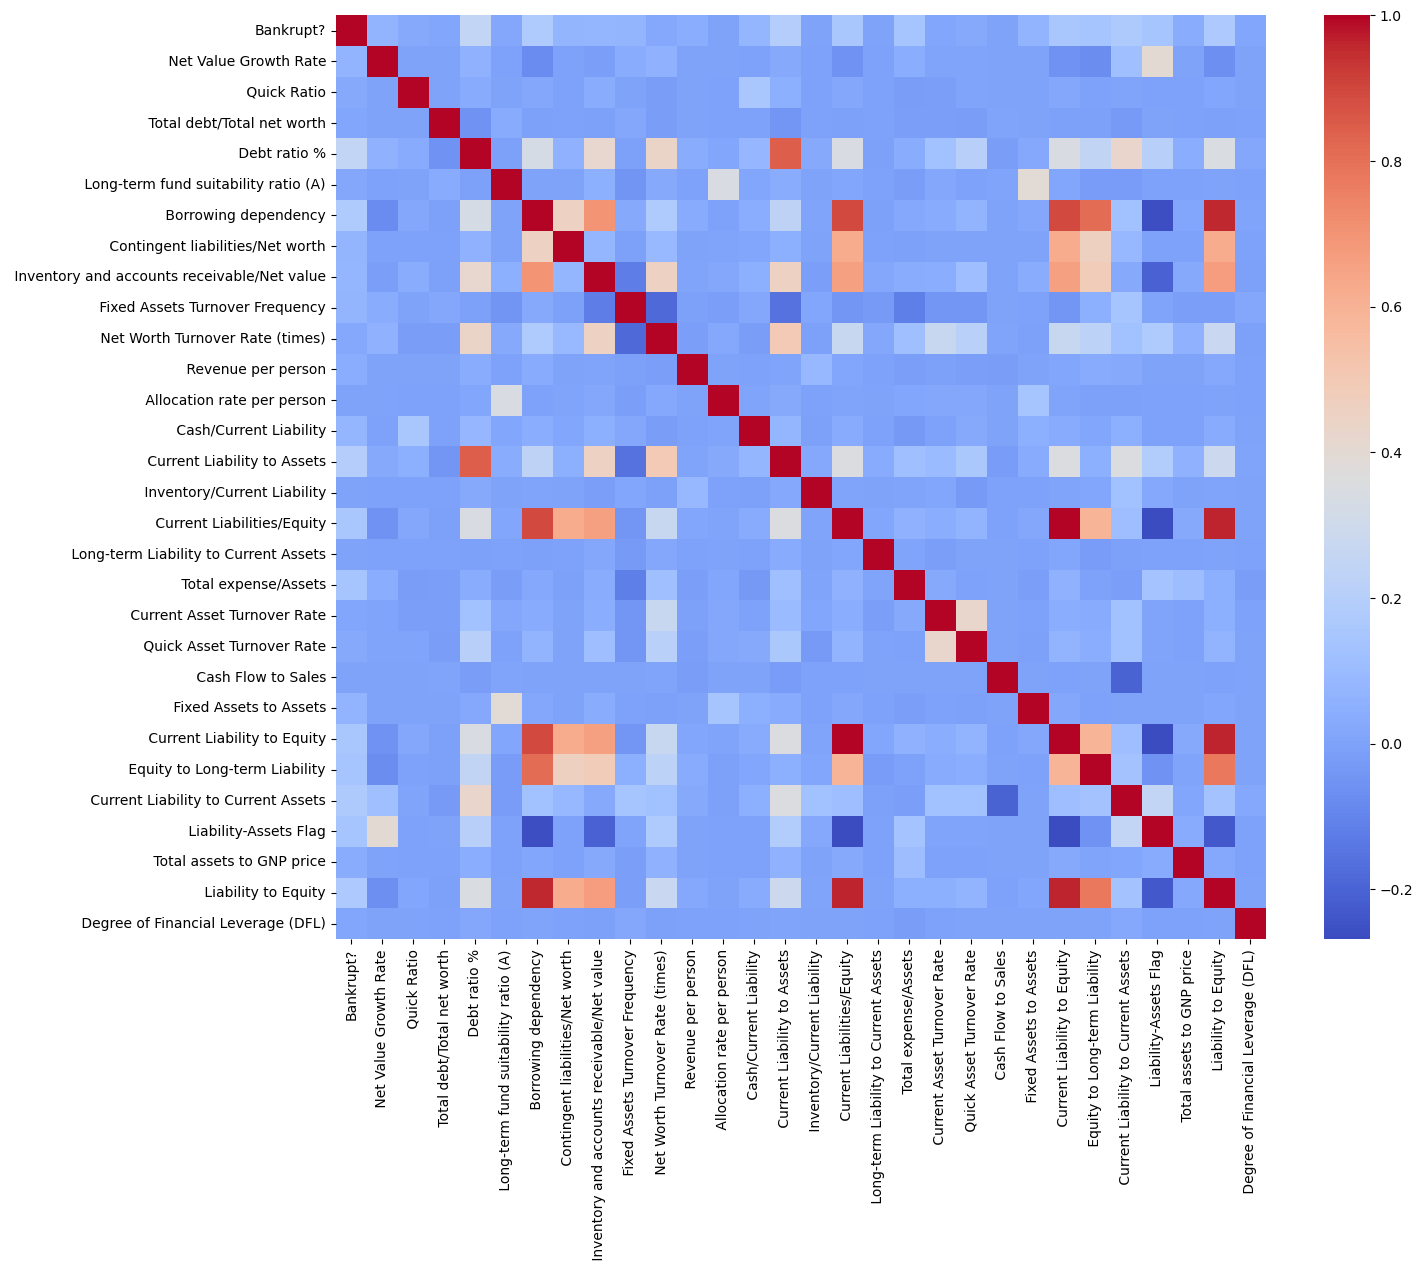

In [16]:
plt.figure(figsize=(15,12))
sn.heatmap(final_data.corr(),cmap='coolwarm',annot=False,fmt='.2f')
plt.show()

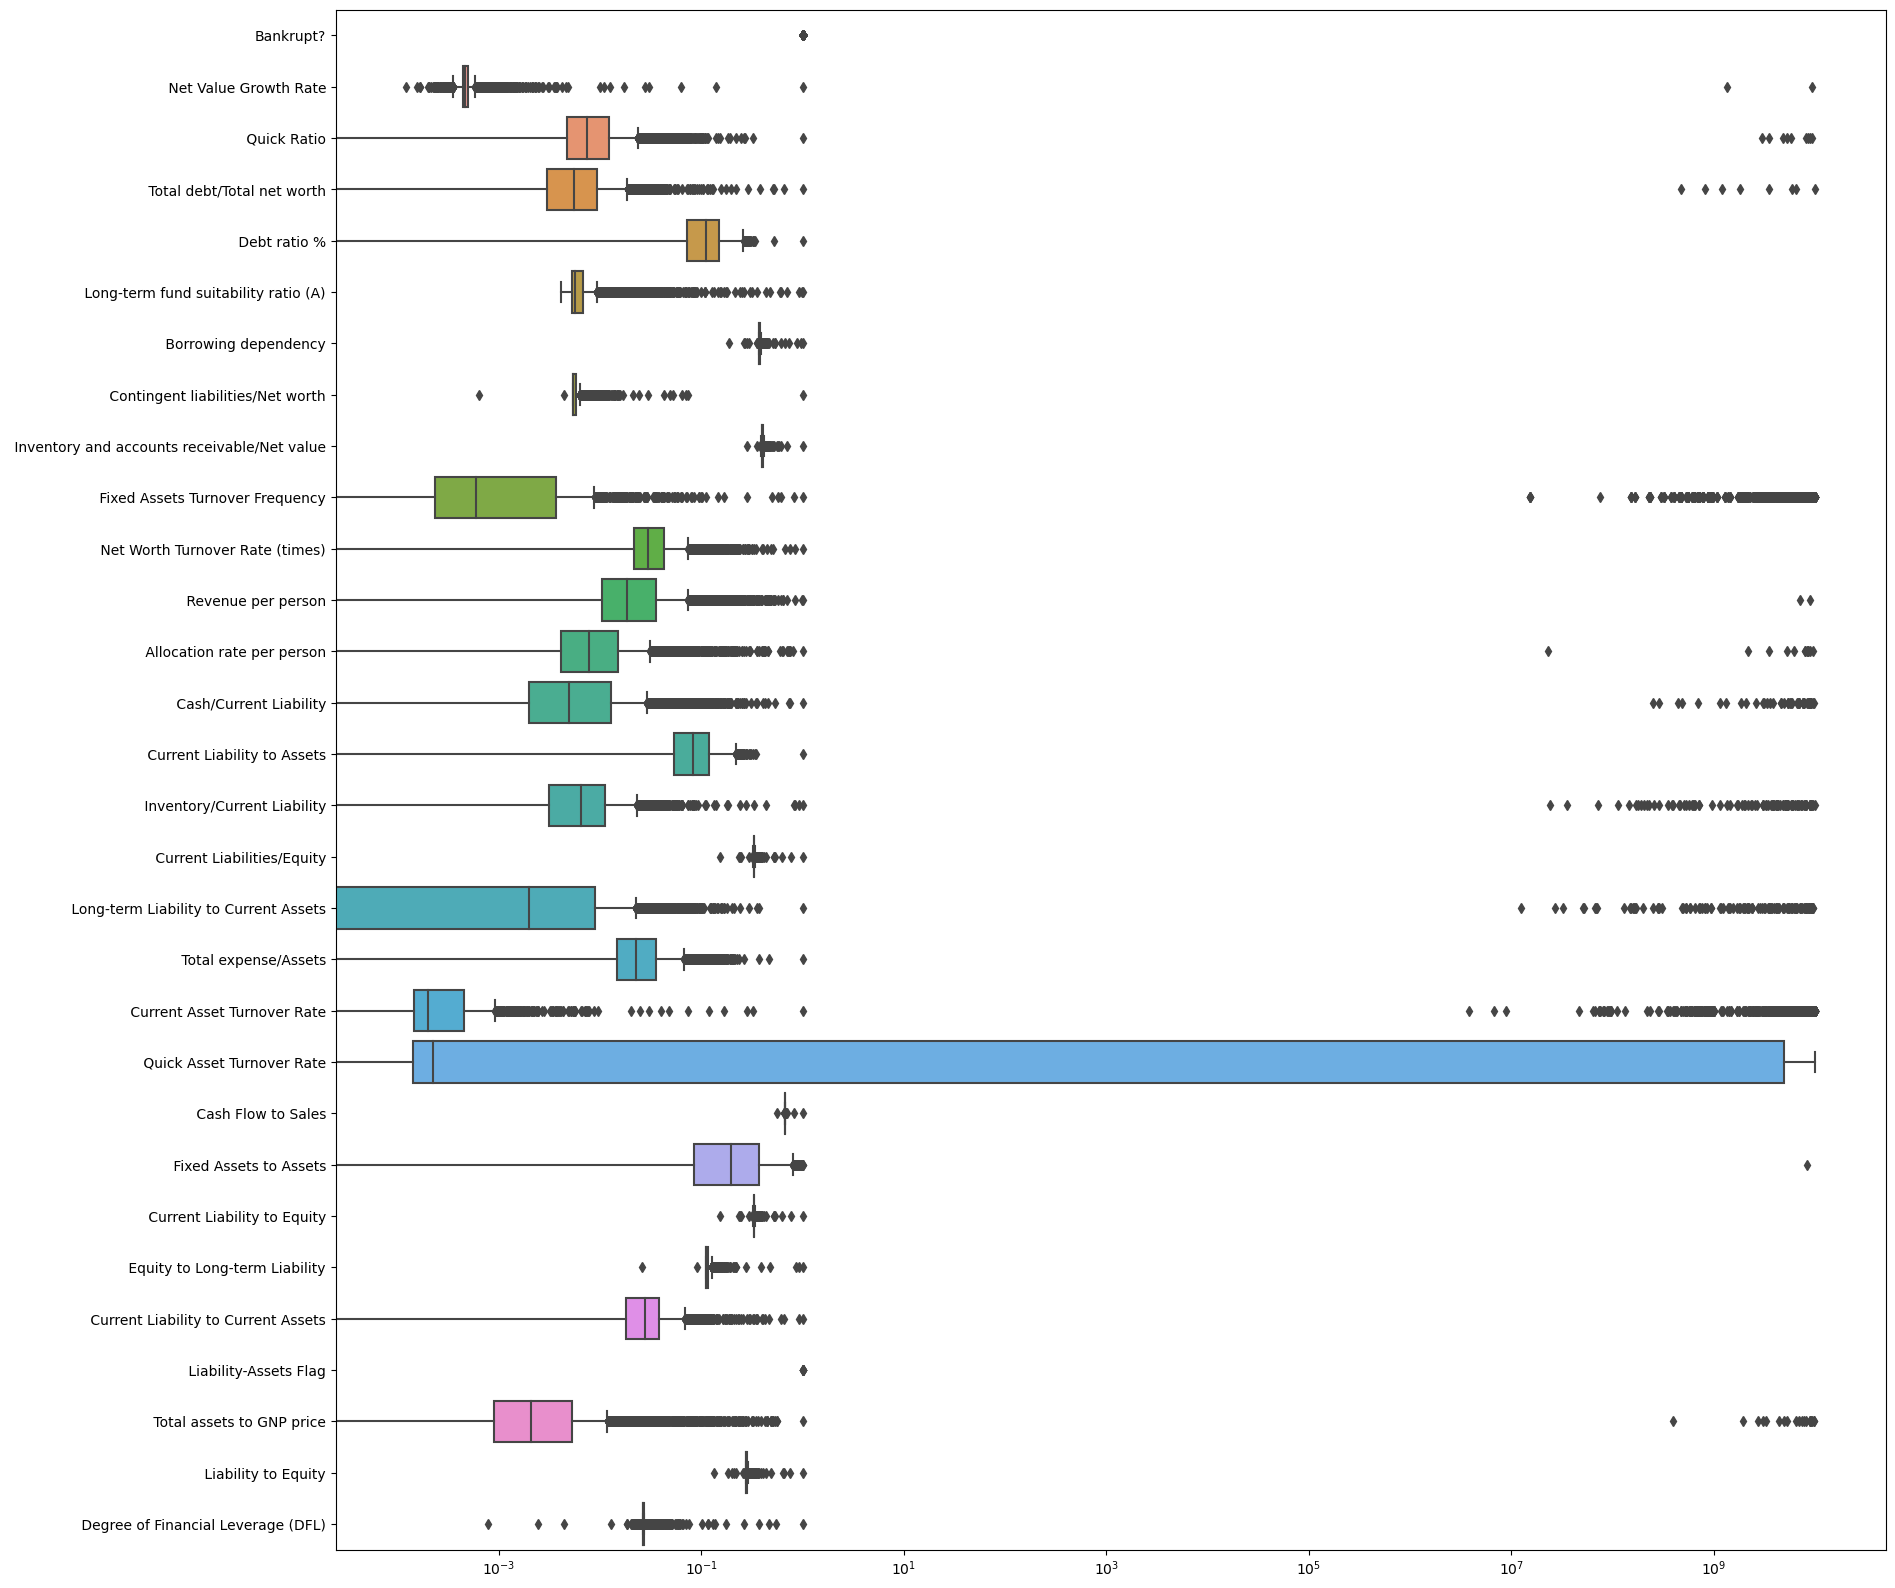

In [17]:
plt.figure(figsize = (20,20))
ax =sn.boxplot(data = final_data, orient="h")
ax.set(xscale="log")
plt.show()

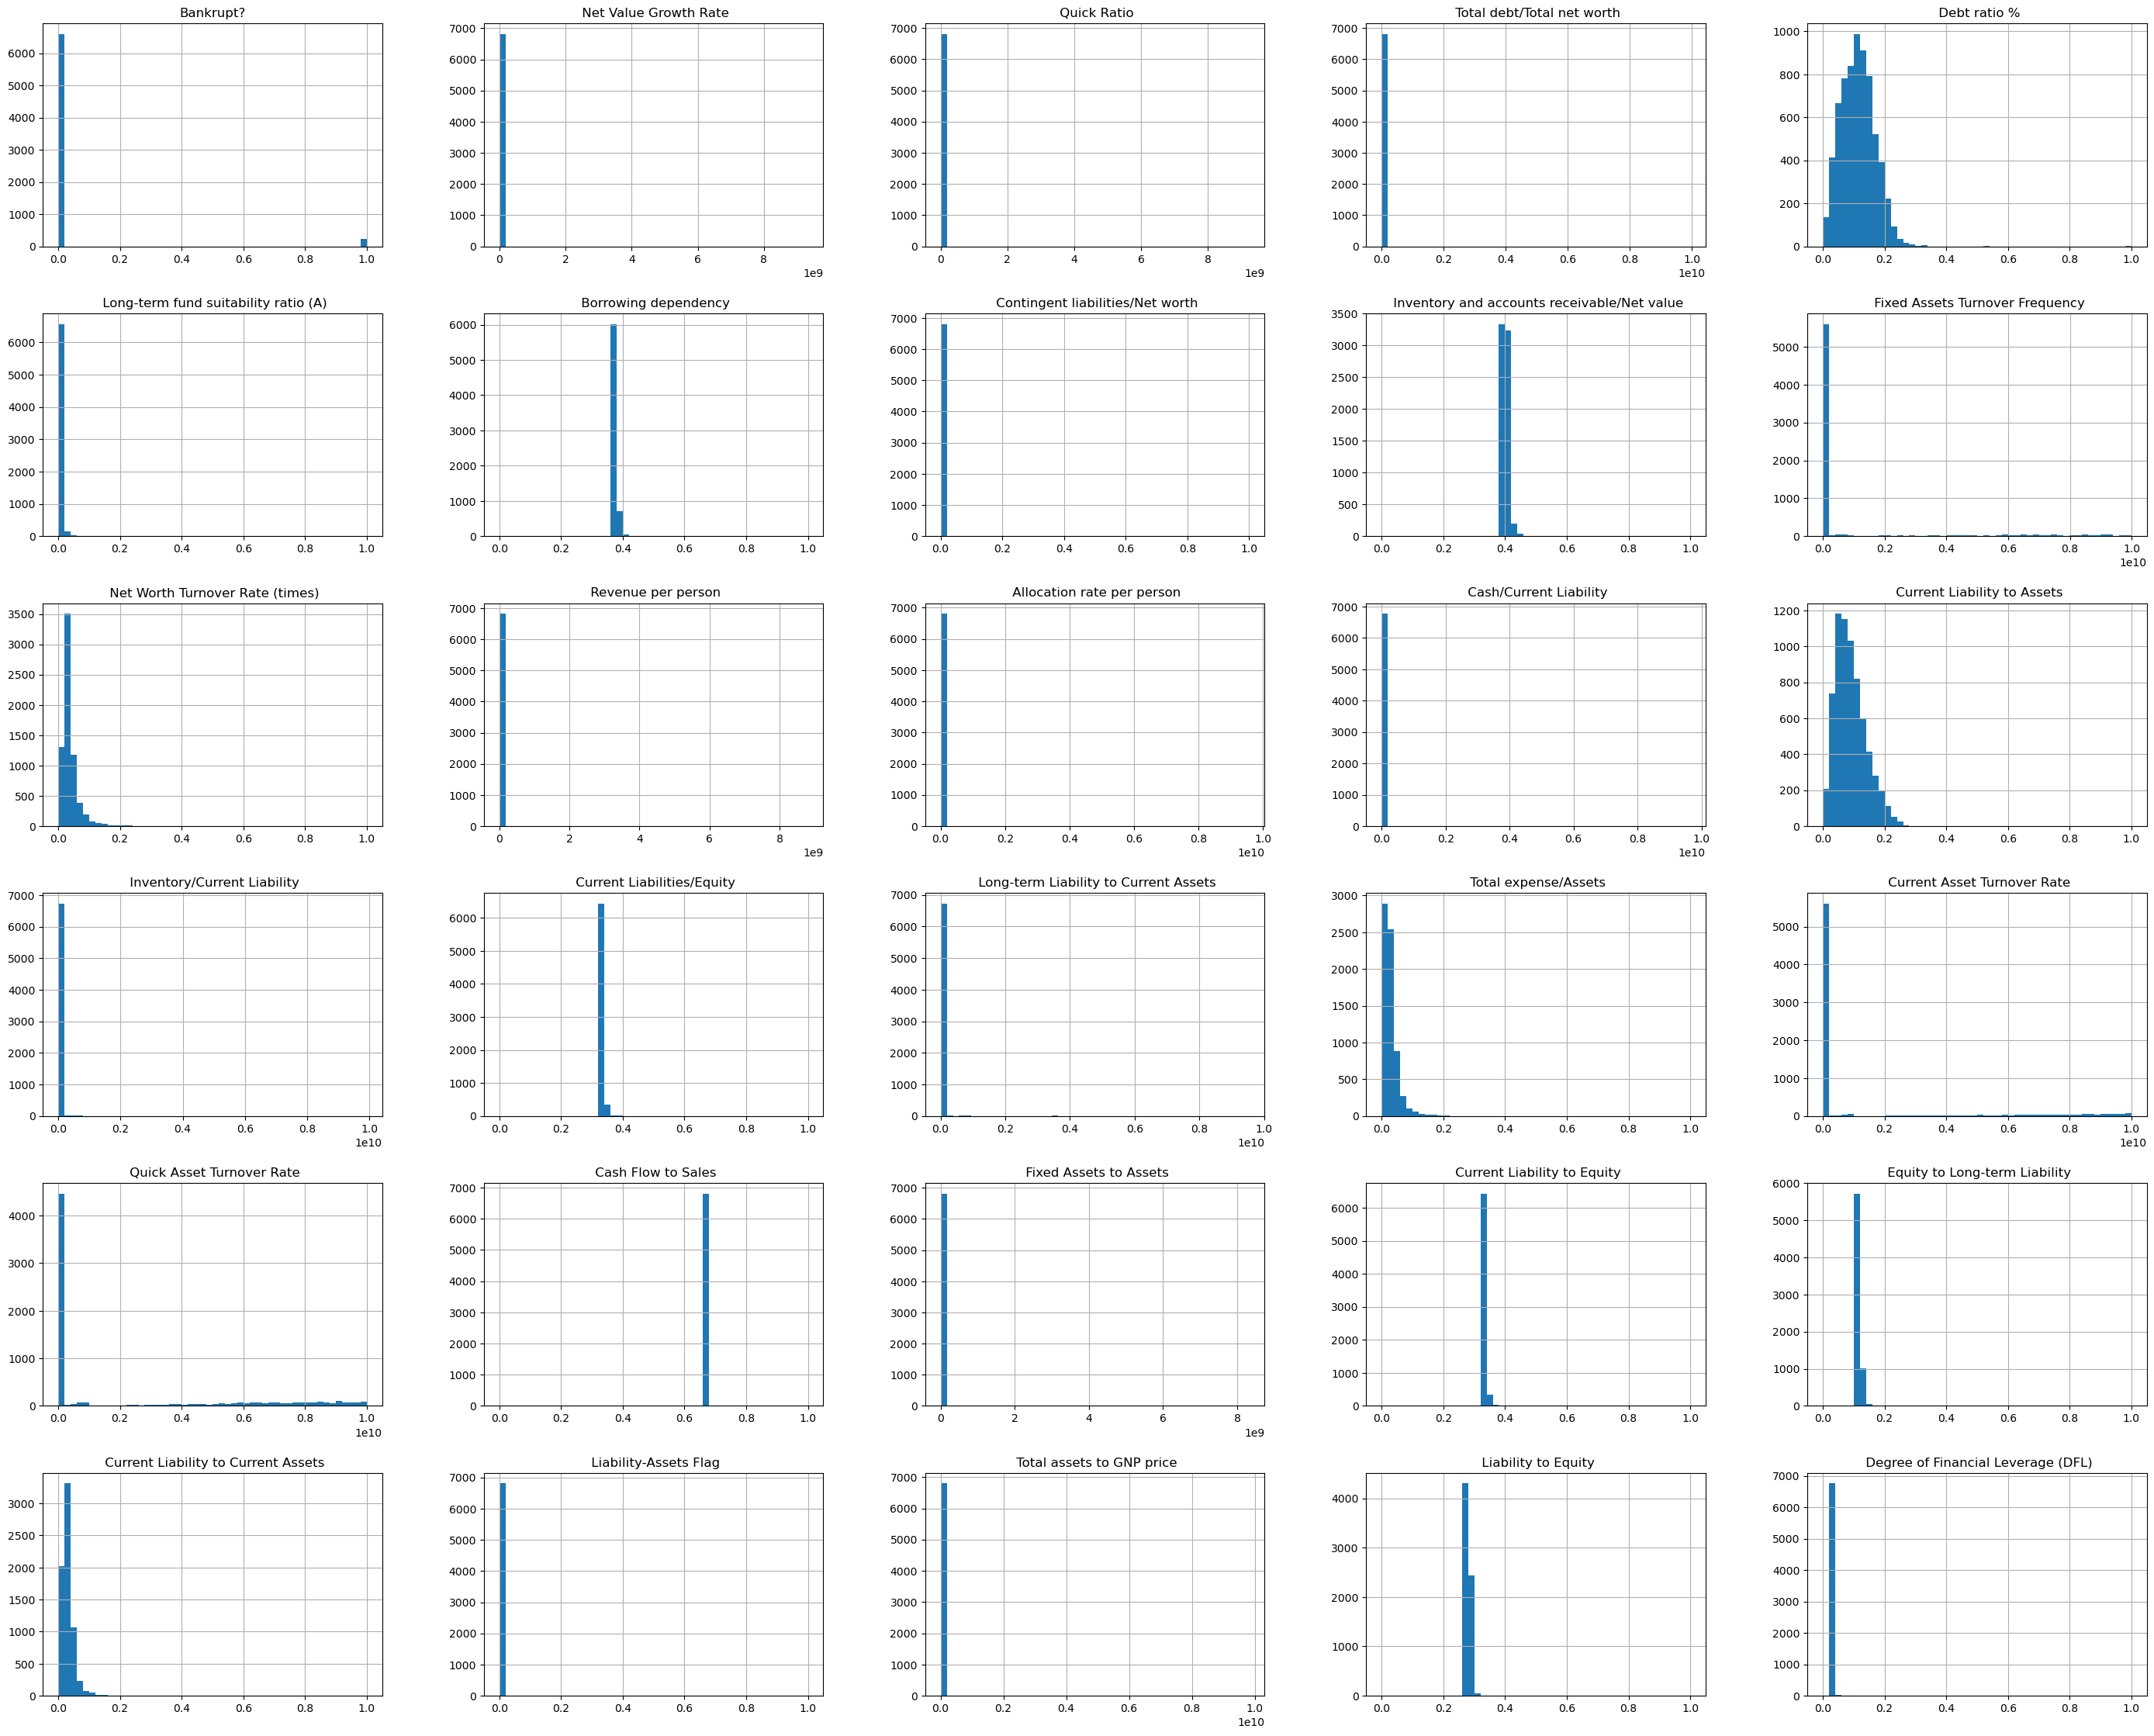

In [18]:
final_data.hist(figsize=(35,28),bins=50)
plt.show()

perform EDA using Auto EDA library like dtale

In [ ]:
#dtale

import dtale
dtale.show(final_data)

In [ ]:
len(final_data.columns)

Detect outliers from final_data and remove it to increase model accuracy

In [22]:
from scipy.stats import zscore

x = final_data.iloc[:,1:]

zscore = x.apply(zscore)

outliers = zscore[(np.abs(zscore) > 3).any(axis=1)]

print("Outliers = ",outliers.shape[0])

Outliers =  830


In [23]:
# Remove the outliers from the final_data dataframe
new_data = x[(np.abs(zscore) <= 3).all(axis=1)]

percentage_removed = (1 - new_data.shape[0] / x.shape[0]) * 100
print(f"The {percentage_removed}% of data removed")

The 12.1718727086083% of data removed


In [24]:
new_data.shape

(5989, 29)

In [25]:
new_data.describe()

,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),...,Quick Asset Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Liability to Equity,Degree of Financial Leverage (DFL)
count,5989.000000,5989.000000,5.989000e+03,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5.989000e+03,5989.000000,...,5.989000e+03,5989.000000,5989.000000,5989.000000,5989.000000,5989.000000,5989.0,5989.000000,5989.000000,5989.000000
mean,0.000713,0.011144,7.914511e+04,0.109777,0.007426,0.373904,0.005767,0.401851,7.005884e+08,0.035721,...,2.082089e+09,0.671573,0.244039,0.330725,0.115006,0.028919,0.0,0.008294,0.279631,0.027056
std,0.013078,0.017572,6.124931e+06,0.049267,0.006368,0.004854,0.000960,0.006398,1.938473e+09,0.021188,...,3.362559e+09,0.000231,0.192638,0.003981,0.006068,0.016563,0.0,0.032647,0.003882,0.002077
min,0.000282,0.000100,1.112540e-04,0.001512,0.004716,0.369637,0.005366,0.393663,0.000000e+00,0.009032,...,0.000000e+00,0.661814,0.000000,0.326175,0.110933,0.000000,0.0,0.000102,0.274813,0.000000
25%,0.000442,0.004965,2.926344e-03,0.071379,0.005265,0.370140,0.005366,0.397490,2.208973e-04,0.021935,...,1.398003e-04,0.671565,0.088015,0.328077,0.110933,0.017534,0.0,0.000898,0.276894,0.026791
50%,0.000463,0.007660,5.354782e-03,0.109200,0.005696,0.372480,0.005366,0.400150,5.098795e-04,0.029516,...,2.103792e-04,0.671574,0.194670,0.329580,0.112381,0.026799,0.0,0.002040,0.278662,0.026810
75%,0.000500,0.012538,8.799095e-03,0.145176,0.006850,0.375979,0.005769,0.404342,2.199895e-03,0.042258,...,4.630000e+09,0.671587,0.358575,0.332000,0.117029,0.037034,0.0,0.005145,0.281159,0.026912
max,1.000000,1.000000,4.740000e+08,0.256976,0.090172,0.406463,0.030065,0.441948,8.400000e+09,0.147742,...,1.000000e+10,0.675956,0.983645,0.369839,0.169388,0.123829,0.0,1.000000,0.316925,0.065766


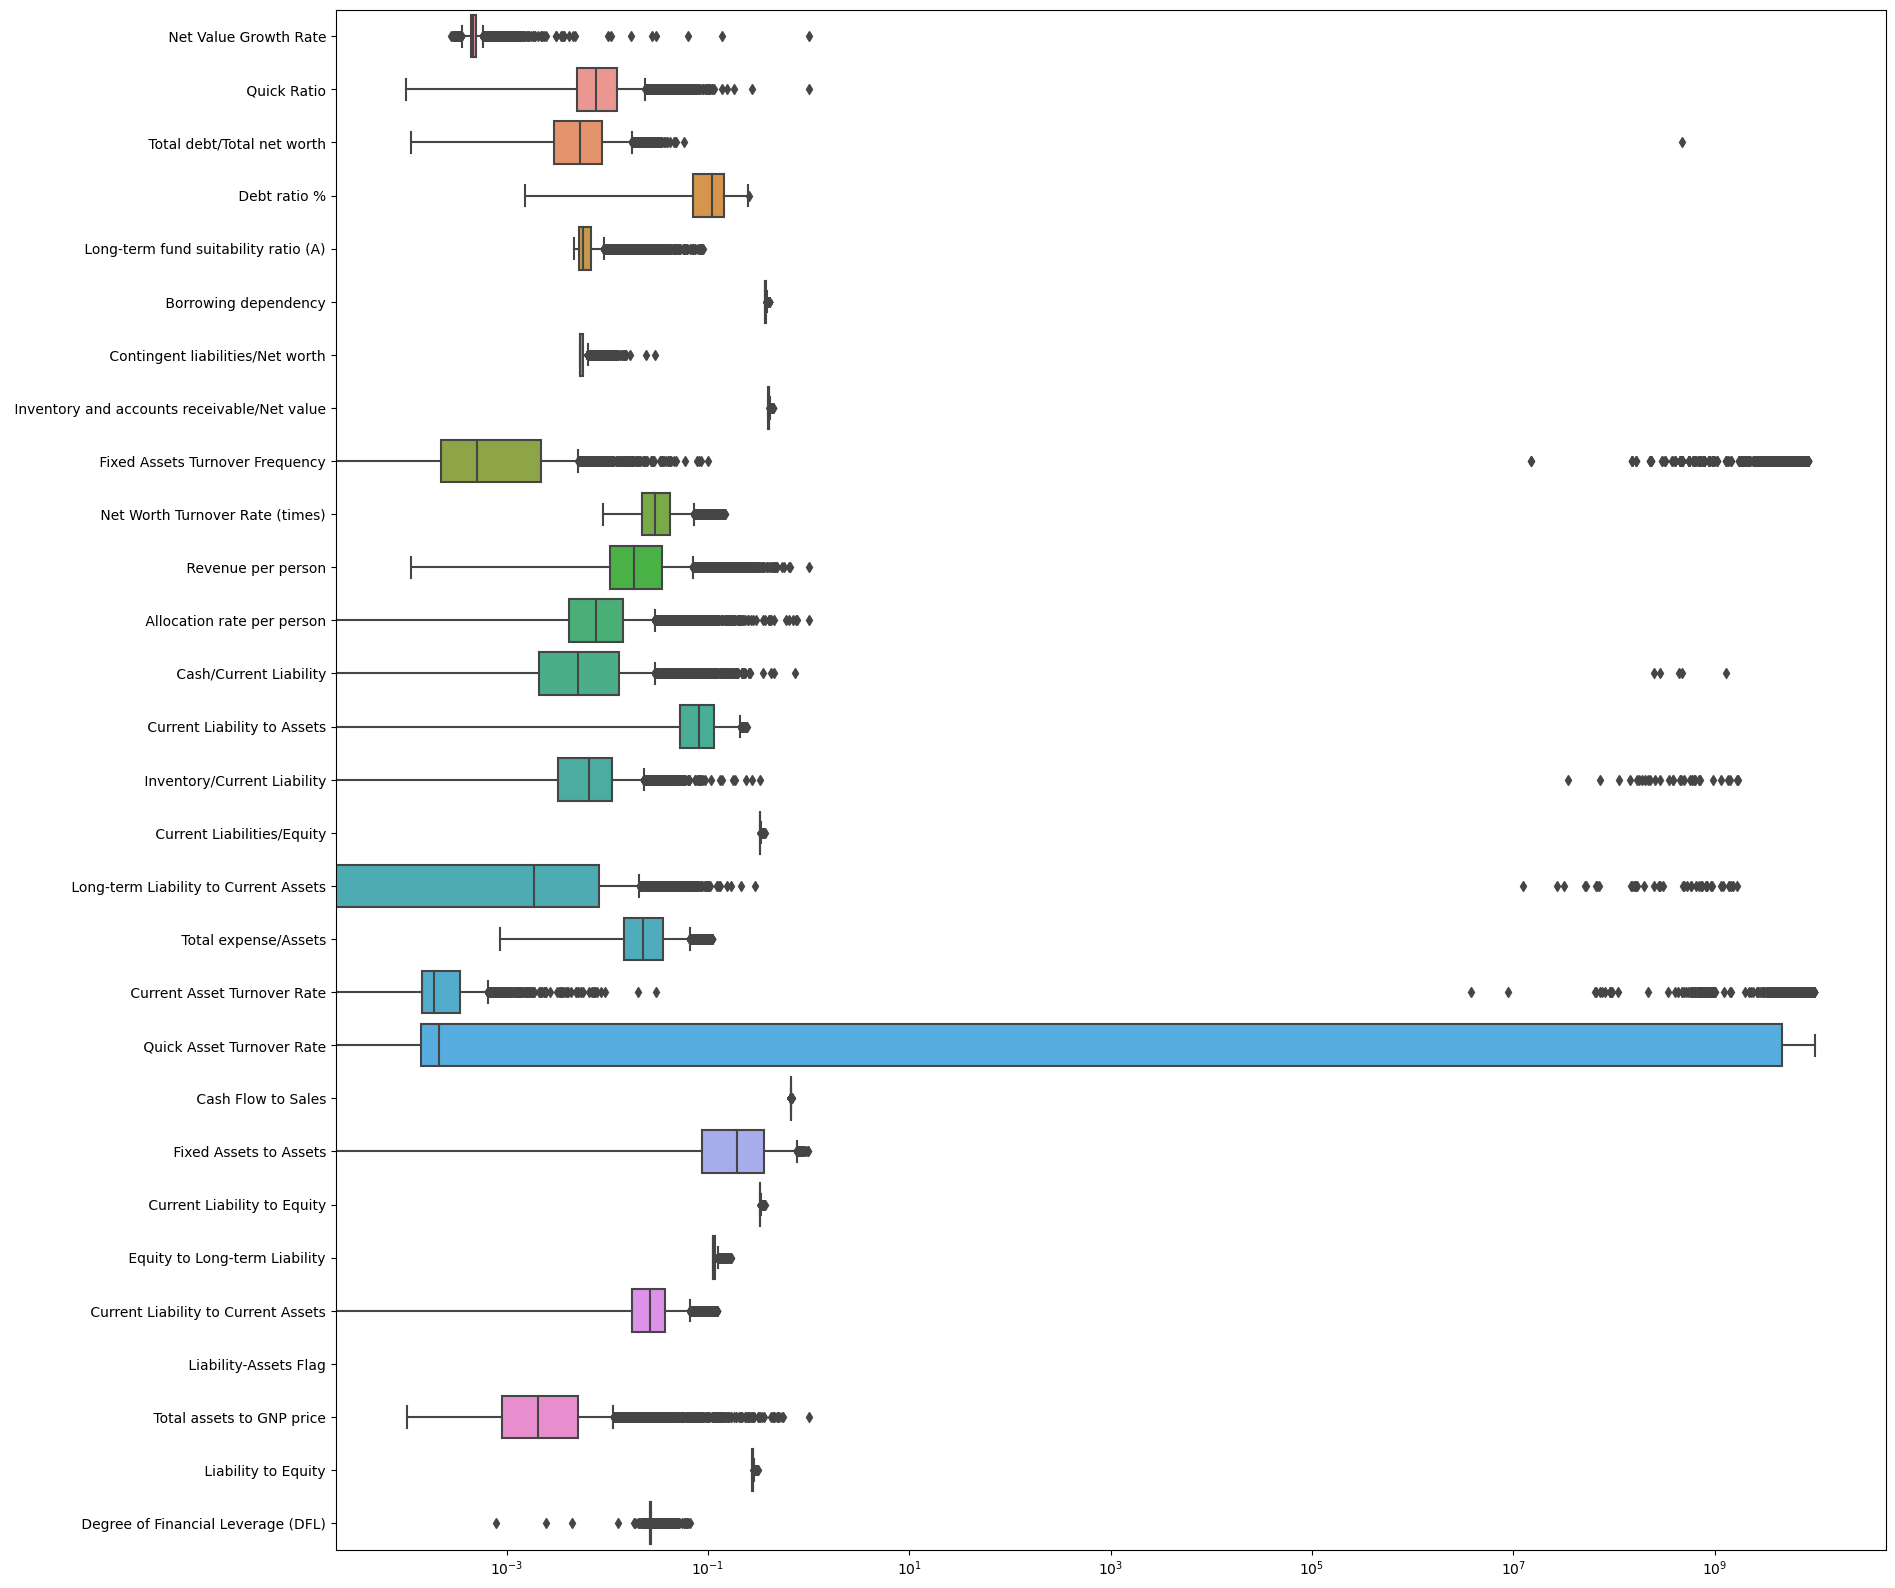

In [26]:
plt.figure(figsize = (20,20))
ax =sn.boxplot(data = new_data, orient="h")
ax.set(xscale="log")
plt.show()

In [33]:
new_data.to_csv("New_Data.csv")

In [35]:
x = new_data
y = final_data['Bankrupt?']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [5989, 6819]

# Model Building

In [ ]:
# Cart classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)